In [5]:
using PyPlot, FFTW

## Frequency domain filtering
#### GEOPH 526

M D Sacchi  
msacchi@ualberta.ca

This notebook aims to show how one uses the symmetries of the DFT to design an algorithm for frequency-domain filtering.


### Continuous case

In the continuous form formulation, we express the relationship between input and output (In the frequency domain) as follows

$$Y(\omega) = B(\omega) X(\omega)$$

where 

$$y(t) \leftrightarrow Y(\omega)$$
$$x(t) \leftrightarrow X(\omega)$$

$B(\omega)$ is a filter, for instance, a low pass filter.  If the imput signal $x(t)$ is real then the output $y(t)$ should also be real. Remember the following relationship for real time-domain signals

$$X(\omega) = X^*(-\omega) \tag 1$$
$$Y(\omega) = Y^*(-\omega) \tag 2$$

Therefore, the filer $B(\omega)$ must also obey $B(\omega) = B^*(-\omega)$.

### Discrete case

In this case, we adopt the DFT, and one has to be careful with the symmetries of the DFT coefficients. For a real times series  $x = [x_0,\dots, x_{N-1}]$, the DFT is given by

$$X_k = \sum_{n=0}^{N-1} x_n e^{-i 2\pi \frac{nk}{N}},\qquad k=0,\dots,N-1$$

and now the symmetries are given by  $X_k = X_{N-k}^*$. Hence, we need to design a frequency-domain filter
that does not alter the symmetries. The output/input relationship of the DFT coefficients is
given by 

$$Y_k = B_k \,. X_k,\qquad, k=0,\dots N-1$$.

where to honour the DFT symmetry, $B_k  = B_{N-k}^*$. Now, the filter $B_k$ is real and therefore,
$B_k  = B_{N-k}$.

In the program below I will show how this is done. The flow is as follows

- $X = DFT (x)$
- design $B$
- $Y = B.* X$
- $y = {iDFT}(Y)$

Notice that below I will replace the DFT by the FFT. 


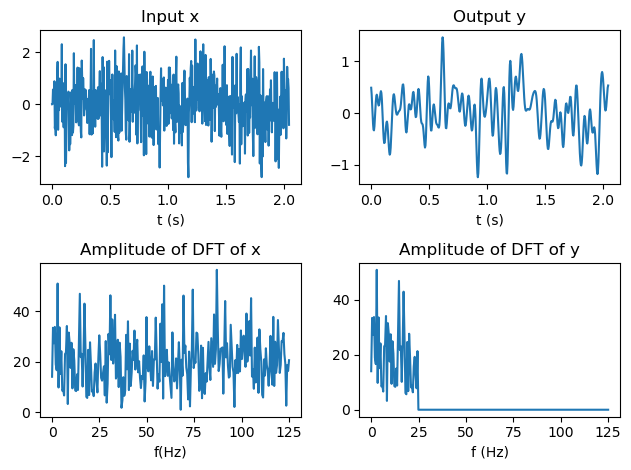

In [56]:
# The signal to filter is a N-point series of random numbers

N  = 512;
N2 = convert(Int, N/2)
dt = 4.0/1000
x = randn(N)

# -- Goto freqency --- via DFT/FFT

X = fft(x)

# -- Desing the frequency domain low-pass filter for cut off frequency of fc=25Hz
    
B = zeros(N)
fc = 25;

# Transform fc to associated DFT frequency index k

kc = convert(Int, round(fc*N*dt))

# -- Pass-band (Multiply amplitude by 1 )

for   k=1:kc
    B[k]=1.0;
end

# --  Symmetries 

for k = N2+1:N
    B[k]=B[N-k+2]
end


# -- Filtering 

Y = B.*X 

# -- and go back to time 

    y = real.(ifft(Y))

    t = collect(0:1:N-1)*dt
    f = collect(0:1:N2)/(N*dt)
    

# Amplitude for plotting

    F(u) = abs.(fft(u))

    subplot(221); plot(t,x); xlabel("t (s)"); 
    title("Input x")
    subplot(222); plot(t,y); xlabel("t (s)")
    title("Output y")
    subplot(223); plot(f,F(x)[1:N2+1]); xlabel("f(Hz)")
    title("Amplitude of DFT of x")
    subplot(224); plot(f,F(y)[1:N2+1]); xlabel("f (Hz)")
    title("Amplitude of DFT of y")

    tight_layout()

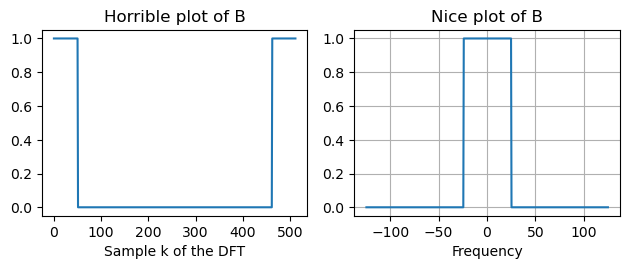

In [52]:
# Frequency response of filter B

k = collect(0:1:N-1)
subplot(221); plot(k,B); xlabel("Sample k of the DFT");title("Horrible plot of B")

f = collect(-N2+1:1:N2)/(N*dt)
subplot(222); plot(f,fftshift(B)); xlabel("Frequency");grid(true); title("Nice plot of B")
tight_layout()